<a href="https://colab.research.google.com/github/tirals88/pytorch-drl/blob/main/DRL_Chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'PyTorchÎ•º ÌôúÏö©Ìïú Í∞ïÌôîÌïôÏäµ/Ïã¨Ï∏µÍ∞ïÌôîÌïôÏäµ Ïã§Ï†ÑÏûÖÎ¨∏' Ï±Ö Ïä§ÌÑ∞Îîî ÎÇ¥Ïö©ÏùÑ Google ColabÏúºÎ°ú Ï†ïÎ¶¨ÌïòÏó¨ Ïò¨Î¶ΩÎãàÎã§.

Github ÏòàÏ†ú ÏΩîÎìú Ï£ºÏÜå : 'https://github.com/wikibook/pytorch-drl'

PyTorchÎ•º ÌôúÏö©Ìïú Í∞ïÌôîÌïôÏäµ/Ïã¨Ï∏µÍ∞ïÌôîÌïôÏäµ Ïã§Ï†ÑÏûÖÎ¨∏

https://wikibook.co.kr/pytorch-drl/

## 2.2 ÎØ∏Î°úÏôÄ ÏóêÏù¥Ï†ÑÌä∏ Íµ¨ÌòÑ

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂Å ÌôîÎ©¥Ïóê Í∑∏Î¶ºÏù¥ÎÇò ÎèÑÌëúÎ•º Ï∂úÎ†•ÌïòÍ≤å ÌïòÎäî ÏÑ§Ï†ï

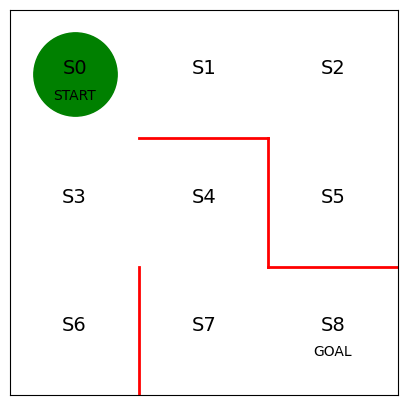

In [3]:
# Ï¥àÍ∏∞ ÏÉÅÌÉúÏùò ÎØ∏Î°ú Î™®Ïäµ

# Ï†ÑÏ≤¥ Í∑∏Î¶ºÏùò ÌÅ¨Í∏∞ Î∞è Í∑∏Î¶ºÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Î≥ÄÏàò ÏÑ†Ïñ∏
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# Î∂âÏùÄ Î≤Ω Í∑∏Î¶¨Í∏∞ / Î∂âÏùÄ Î≤ΩÏùÄ ÌÜµÍ≥ºÍ∞Ä Î∂àÍ∞ÄÎä•Ìï®
plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color='red', linewidth=2)
plt.plot([2,3], [1,1], color='red', linewidth=2)
plt.plot([2,2], [1,2], color='red', linewidth=2)

# ÏÉÅÌÉúÎ•º ÏùòÎØ∏ÌïòÎäî Î¨∏ÏûêÏó¥(S0 ~ S8) ÌëúÏãú
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')

plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# Í∑∏Î¶ºÏùÑ Í∑∏Î¶¥ Î≤îÏúÑ Î∞è ÎààÍ∏à Ï†úÍ±∞ ÏÑ§Ï†ï
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

# S0Ïóê ÎÖπÏÉâÏõêÏúºÎ°ú ÌòÑÏû¨ ÏúÑÏπòÎ•º ÌëúÏãú
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

Í∞ïÌôîÌïôÏäµÏóêÏÑú ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ïñ¥ÎñªÍ≤å ÌñâÎèôÌï†ÏßÄÎ•º Í≤∞Ï†ïÌïòÎäî Í∑úÏπôÏùÑ Ï†ïÏ±Ö(policy)Ïù¥ÎùºÍ≥† ÌïúÎã§.

ÎòêÌïú ÏÉÅÌÉúÍ∞Ä $s$Ïùº Îïå, ÌñâÎèô $a$Î•º Ï∑®Ìï† ÌôïÎ•†ÏùÄ ÌååÎùºÎØ∏ÌÑ∞ ùõ≥Í∞Ä Í≤∞Ï†ïÌïòÎäî Ï†ïÏ±Ö œÄÎ•º Îî∞Î•∏Îã§Îäî ÏùòÎØ∏Î°ú $\pi_{\theta}(s, a)$Î°ú ÌëúÍ∏∞ÌïúÎã§.

ÎØ∏Î°úÌÉêÏÉâÏóêÏÑú ÏÉÅÌÉú $s$Îäî ÏóêÏù¥Ï†ÑÌä∏Ïùò ÎØ∏Î°ú ÎÇ¥ ÏúÑÏπòÏóê Ìï¥ÎãπÌïòÎ©∞, 9Í∞úÏùò ÏÉÅÌÉúÍ∞Ä Ï°¥Ïû¨ÌïúÎã§.

ÌñâÎèô $a$Îäî ÏÉÅÌÉúÏóê ÏûàÏùÑ ÎñÑ ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ï∑®Ìï† Ïàò ÏûàÎäî ÌñâÎèôÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, ÏÉÅ, Ìïò, Ï¢å, Ïö∞Î°ú Ïù¥ÎèôÌïòÎäî 4Í∞ÄÏßÄ ÌñâÎèôÏùÑ Ï∑®Ìï† Ïàò ÏûàÎã§. Îã§Îßå Î∂âÏùÄ Î≤ΩÏù¥ ÏûàÎäî Î∞©Ìñ•ÏúºÎ°úÏùò Ïù¥ÎèôÏùÄ Ìï† Ïàò ÏóÜÎã§.

Ï†ïÏ±Ö $\pi$ Îäî Îã§ÏñëÌïú Î∞©Î≤ïÏúºÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§. Ìï®ÏàòÎ°ú ÎÇòÌÉÄÎÇº ÏàòÎèÑ ÏûàÍ≥†, Ïã¨Ï∏µÍ∞ïÌôîÌïôÏäµÏóêÏÑúÎäî Ïã†Í≤ΩÎßùÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ÎèÑ ÌïúÎã§.

Ïù¥Î≤àÏû•Ïùò ÌÉúÏä§ÌÅ¨Ïù∏ ÎØ∏Î°úÌÉêÏÉâÏóêÏÑúÎäî Ï†ïÏ±ÖÏùÑ ÌÉÄÎÇòÎÇ¥Îäî Í∞ÄÏû• Í∞ÑÎã®Ìïú Î∞©Î≤ïÏù∏ ÌëúÌòïÏãù ÌëúÌòÑ(tabular representation)ÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§. ÌëúÌòïÏãù ÌëúÌòÑÏùÄ ÌñâÏù¥ ÏÉÅÌÉú $s$, Ïó¥Ïù¥ ÌñâÎèô $a$Î•º ÎÇòÌÉÄÎÇ∏Îã§.

Ï†ïÏ±Ö $œÄ$Í∞Ä Ìï®ÏàòÏù∏ Í≤ΩÏö∞ ÌååÎùºÎØ∏ÌÑ∞ $\theta$Îäî Ìï®ÏàòÏùò Î≥ÄÏàòÍ∞Ä ÎêòÎ©∞, Ï†ïÏ±ÖÏù¥ Ïã†Í≤ΩÎßùÏù∏ Í≤ΩÏö∞, Ïú†Îãõ Í∞ÑÏùò Í≤∞Ìï© Í∞ÄÏ§ëÏπòÏóê Ìï¥ÎãπÌïúÎã§. ÌëúÌòïÏãù ÌëúÌòÑÏúºÎ°ú Ï†ïÏ±ÖÏùÑ ÎÇòÌÉÄÎÇ¥Í≤å ÎêòÎØÄÎ°ú ÏÉÅÌÉú $s$ÏóêÏÑú ÌñâÎèô$a$Î•º Ï∑®Ìï† ÌôïÎ•†Î°ú Î≥ÄÌôòÌï† Ïàò ÏûàÎäî Í∞íÏù¥ ÎêúÎã§.

Î®ºÏ†Ä ÌååÎùºÎØ∏ÌÑ∞ $\theta$Ïùò Ï¥àÍπÉÍ∞í $\theta_0$ÏùÑ Íµ¨ÌòÑÌïúÎã§. Ïù¥Îèô Í∞ÄÎä•Ìïú Î∞©Ìñ•ÏóêÎäî 1, Î≤ΩÏù¥ ÏûàÏñ¥ Ïù¥ÎèôÌï† Ïàò ÏóÜÎäî Î∞©Ìñ•ÏóêÎäî **np.nan**ÏùÑ ÎåÄÏûÖÌñàÎã§.

Ïó¥Ïùò ÏàúÏÑúÎäî ÏÉÅ, Ïö∞ Ìïò, Ï¢åÎ°ú ÏÉÅÎ∂ÄÌÑ∞ ÏãúÍ≥ÑÎ∞©Ìñ•ÏàúÏù¥Îã§.

In [4]:
# Ï†ïÏ±ÖÏùÑ Í≤∞Ï†ïÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¥àÍ∏∞Í∞í theta_0 ÏÑ§Ï†ï

# ÌñâÏùÄ ÏÉÅÌÉú 0~7, Ïó¥ÏùÄ Î∞©Ìñ•(ÏÉÅ, Ïö∞, Ìïò, Ï¢å)ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§
theta_0 = np.array([[np.nan, 1, 1, np.nan], # s0
                    [np.nan, 1, np.nan, 1], # s1
                    [np.nan, np.nan, 1, 1], # s2
                    [1, 1, 1, np.nan],      # s3
                    [np.nan, np.nan, 1, 1], # s4
                    [1, np.nan, np.nan, np.nan], # s5
                    [1, np.nan, np.nan, np.nan], # s6
                    [1, 1, np.nan, np.nan],     # s7
                            ])                            # s8ÏùÄ Î™©ÌëúÏßÄÏ†êÏù¥ÎØÄÎ°ú Ï†ïÏ±ÖÏù¥ ÏóÜÎã§

```np.nan : Return the sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.```

In [ ]:
theta_0

array([[nan,  1.,  1., nan],
       [nan,  1., nan,  1.],
       [nan, nan,  1.,  1.],
       [ 1.,  1.,  1., nan],
       [nan, nan,  1.,  1.],
       [ 1., nan, nan, nan],
       [ 1., nan, nan, nan],
       [ 1.,  1., nan, nan]])

ÌååÎùºÎØ∏ÌÑ∞Î•º Î≥ÄÌôòÌïòÏó¨ Ï†ïÏ±ÖÏùÑ Íµ¨ÌïòÎäî Î∞©Î≤ïÏùÄ ÏïÑÎûòÏôÄ Í∞ôÎã§. Îã®ÏàúÌïú Î≥ÄÌôò Î∞©Î≤ïÏùÑ ÌÉùÌï¥ÏÑú Ïù¥Îèô Î∞©Ìñ•Ïóê ÎåÄÌïú $\theta$ Í∞íÏùò ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï¥ÏÑú ÌôïÎ•†Î°ú ÏÇºÎäîÎã§.

In [5]:
# Ï†ïÏ±Ö ÌååÎùºÎØ∏ÌÑ∞ thetaÎ•º ÌñâÎèô Ï†ïÏ±Ö piÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
def simple_convert_into_pi_from_theta(theta):
  '''Îã®ÏàúÌûà Í∞íÏùò ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞'''

  [m, n] = theta.shape
  pi = np.zeros((m, n))
  for i in range(0, m):
    pi[i, :] = theta[i, :] / np.nansum(theta[i, :]) # Í∞Å Ìñâ ÎÇ¥ÏóêÏÑú Ï∑®Ìï† Ïàò ÏûàÎäî Í∞í ÎπÑÏú®

  pi = np.nan_to_num(pi) # nanÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò

  return pi

In [ ]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [4]:
# ÏóêÏù¥Ï†ÑÌä∏Í∞Ä Ï†ïÏ±ÖÏùÑ Îî∞Îùº ÌñâÎèôÌïòÍ≤åÎÅî Î™ÖÎ†π
# 1Îã®Í≥Ñ Ïù¥Îèô ÌõÑ ÏóêÏù¥Ï†ÑÌä∏Ïùò ÏÉÅÌÉúÎ•º Íµ¨ÌïòÎäî Ìï®Ïàò Ï†ïÏùò

def get_next_s(pi, s):
  direction = ["up", "right", "down", "left"]

  next_direction = np.random.choice(direction, p=pi[s, :])
  # ÌòÑÏû¨ ÏÉÅÌÉúÍ∞Ä s Ïùº Îïå, sÌñâÏùò Í∞ÄÎä•Ìïú ÌñâÎèô(Î∞©Ìñ•) aÎ•º ÎûúÎç§ÌïòÍ≤å ÏÑ†ÌÉù

  if next_direction == "up":
    s_next = s - 3 # ÏúÑÎ°ú Ïù¥ÎèôÌïòÎ†§Î™Ö ÏÉÅÌÉú Í∞íÏù¥ 3ÎßåÌÅº Í∞êÏÜåÌï¥ÏïºÌïúÎã§

  elif next_direction == "right":
    s_next = s + 1

  elif next_direction == "down":
    s_next = s + 3

  elif next_direction == "left":
    s_next = s - 1

  return s_next

np.random.choice
- Parameters
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected multiple times.
    p : 1-D array-like, optional
        The probabilities associated with each entry in a.
        If not given, the sample assumes a uniform distribution over all
        entries in ``a``.

In [5]:
# Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•º Îïå ÍπåÏßÄ ÏóêÏù¥Ï†ÑÌä∏Î•º Í≥ÑÏÜç Ïù¥ÎèôÏãúÌÇ§Îäî Ìï®Ïàò

def goal_maze(pi):
  s = 0
  state_history = [0]

  while(1):
    next_s = get_next_s(pi, s)
    state_history.append(next_s)

    if next_s == 8:
      break

    else:
      s = next_s

  return state_history

In [ ]:
# Î™©ÌëúÏßÄÏ†êÏóê Ïù¥Î•º ÎïåÍπåÏßÄ ÎØ∏Î°ú ÏïàÏùÑ Ïù¥Îèô
state_history = goal_maze(pi_0)
print(state_history)
print("Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî {} Îã®Í≥Ñ ÏûÖÎãàÎã§.".format(len(state_history)-1))

[0, 1, 2, 1, 2, 1, 0, 3, 6, 3, 0, 1, 2, 1, 0, 1, 2, 5, 2, 1, 0, 3, 4, 7, 4, 3, 4, 3, 0, 1, 0, 3, 6, 3, 0, 1, 0, 1, 0, 1, 0, 3, 6, 3, 0, 1, 2, 5, 2, 5, 2, 1, 2, 1, 2, 1, 0, 3, 0, 1, 2, 1, 0, 1, 0, 3, 6, 3, 0, 1, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 0, 1, 2, 5, 2, 5, 2, 1, 0, 1, 2, 5, 2, 1, 0, 1, 2, 5, 2, 5, 2, 1, 0, 1, 2, 5, 2, 1, 0, 3, 6, 3, 6, 3, 4, 3, 4, 7, 8]
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 134 Îã®Í≥Ñ ÏûÖÎãàÎã§.


In [ ]:
# ÏóêÏù¥Ï†ÑÌä∏Ïùò Ïù¥Îèô Í≥ºÏ†ïÏùÑ ÏãúÍ∞ÅÌôî
from matplotlib import animation
from IPython.display import HTML

def init():
  '''Î∞∞Í≤Ω Ïù¥ÎØ∏ÏßÄ Ï¥àÍ∏∞Ìôî'''
  line.set_data([], [])
  return (line, )

def animate(i):
  '''ÌîÑÎ†àÏûÑ Îã®ÏúÑÎ°ú Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±'''
  state = state_history[i] # ÌòÑÏû¨ ÏúÑÏπò
  x = (state % 3) + 0.5
  y = 2.5 - int(state / 3)
  line.set_data([x], [y])
  # ÍµêÏû¨ ÎÇ¥ ÏΩîÎìú : line.set_data(x, y)
  # MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  # set_data(x, y) --> set_data([x], [y])
  return (line, )

# Ï¥àÍ∏∞Ìôî Ìï®ÏàòÏôÄ ÌîÑÎ†àÏûÑ Îã®ÏúÑ Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Ïï†ÎãàÎ©îÏù¥ÏÖò ÏÉùÏÑ±
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history),
                               interval = 150, repeat=False) # Ï†ÑÏ≤¥ Í∑∏Î¶º fig Ïóê Ï†ïÏùòÌïú Ìï®Ïàò animate ÏÇ¨Ïö© + line Ïù¥ global variable ÏûÑ

HTML(anim.to_jshtml())

In [ ]:
#matplotlib.animation.FuncAnimation
#matplotlib.animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)[source]

The function to call at each frame. The first argument will be the next value in frames. Any additional positional arguments can be supplied using functools.partial or via the fargs parameter.

The required signature is:

```
def func(frame, *fargs) -> iterable_of_artists
```

It is often more convenient to provide the arguments using functools.partial. In this way it is also possible to pass keyword arguments. To pass a function with both positional and keyword arguments, set all arguments as keyword arguments, just leaving the frame argument unset:


```
def func(frame, art, *, y=None):
    ...

ani = FuncAnimation(fig, partial(func, art=ln, y='foo'))
```


If blit == True, func must return an iterable of all artists that were modified or created. This information is used by the blitting algorithm to determine which parts of the figure have to be updated. The return value is unused if blit == False and may be omitted in that case.

## 2.3 Ï†ïÏ±ÖÎ∞òÎ≥µ(Policy Gradient) Íµ¨ÌòÑ

ÏïûÏ†àÏóêÏÑú ÎØ∏Î°ú ÏïàÏùÑ Î¨¥ÏûëÏúÑÎ°ú Ïù¥ÎèôÌïòÎäî Ï†ïÏ±ÖÏùÑ Íµ¨ÌòÑÌñàÎã§. ÏÇ¨Ïã§ ÌôïÎ•†Ïóê Îî∞Îùº Î¨¥ÏûëÏúÑÎ°ú ÏôîÎã§Í∞îÎã§ÌïòÎã§Í∞Ä Î™©ÌëúÏóê ÏñªÏñ¥Í±∏Î¶¨Îäî ÏÉÅÌô©Ïù¥Îûë Îã§Î•¥ÏßÄ ÏïäÏïòÎã§.

Ïù¥Î≤àÏóêÎäî Î™©ÌëúÎ°ú Í≥ßÏû• Ìñ•ÌïòÎèÑÎ°ù Ï†ïÏ±ÖÏùÑ ÌïôÏäµÏãúÌÇ¨ Í≤ÉÏù¥Îã§. ÌÅ¨Í≤å Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏù¥ ÏûàÎã§.

Ï≤´ Î≤àÏß∏Îäî Ï†ïÏ±ÖÏóê Îî∞Îùº Î™©ÌëúÏóê Îπ†Î•¥Í≤å ÎèÑÎã¨ÌñàÎçò Í≤ΩÏö∞Ïóê ÏàòÌñâÌñàÎçò ÌñâÎèô(action)ÏùÑ Ï§ëÏöîÌïú Í≤ÉÏúºÎ°ú Î≥¥Í≥†, Ïù¥ÎïåÏùò ÌñâÎèôÏùÑ ÏïûÏúºÎ°úÎèÑ Ï∑®Ìï† Ïàò ÏûàÎèÑÎ°ù Ï†ïÏ±ÖÏùÑ ÏàòÏ†ïÌïòÎäî Î∞©Î≤ïÏù¥Îã§. Îã§Ïãú ÎßêÌï¥ Í≤∞Í≥ºÍ∞Ä Ï¢ãÏïòÎçò Í≤ΩÏö∞Ïóê Ï§ëÏãúÌïòÎäî Í≤ÉÏù¥Îã§. Îî•Îü¨ÎãùÏùò gradient descentÏôÄ Í∞ôÏùÄ ÏïÑÏù¥ÎîîÏñ¥Î°ú Î≥¥Ïù∏Îã§.

Îëê Î≤àÏß∏Îäî Î™©Ìëú ÏßÄÏ†êÎ∂ÄÌÑ∞ Í±∞Ïä¨Îü¨ Ïò¨ÎùºÍ∞ÄÎ©∞ Î™©Ìëú ÏßÄÏ†êÍ≥º Í∞ÄÍπåÏö¥ ÏÉÅÌÉúÎ°ú ÏóêÏù¥Ï†ÑÌä∏Î•º Ïú†ÎèÑÌï¥ Ïò§Îäî Î∞©Î≤ïÏù¥Îã§. Ï¶â Î™©Ìëú ÏßÄÏ†ê Ïô∏Ïùò ÏßÄÏ†êÏóêÎèÑ Í∞ÄÏπòÎ•º Î∂ÄÏó¨ÌïòÎäî Í≤ÉÏù¥Îã§.

Ï≤´ Î≤àÏß∏ Î∞©Î≤ïÏùÑ Ï†ïÏ±ÖÎ∞òÎ≥µÏù¥ÎùºÍ≥† ÌïòÎ©∞, Îëê Î≤àÏß∏ Î∞©Î≤ïÏùÄ Í∞ÄÏπòÎ∞òÎ≥µÏù¥ÎùºÍ≥† ÌïúÎã§. Ïù¥Î≤à Ï†àÏóêÏÑúÎäî Ï†ïÏ±ÖÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë ÌïòÎÇòÏù∏ Ï†ïÏ±ÖÍ≤ΩÏÇ¨(policy gradient) ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Íµ¨ÌòÑÌï¥ Î≥¥Í≤†Îã§.

Ïù¥Î≤àÏóêÎäî Î≥ÄÌôòÌï®ÏàòÎ•º simple_convert_into_pi_from_theta Ìï®ÏàòÍ∞Ä ÏïÑÎãå, softmax Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§.

ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÏùò Ï†ïÏùòÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.

$$P(\theta_i) = \frac{exp(\beta\theta_i)}{\sum_{j=1}^{N_a}{exp(\beta\theta_j)}}$$

$\beta$ Îäî Ïó≠Ïò®ÎèÑ inverse temperatureÎùºÍ≥† ÌïòÎ©∞ Ïó≠Ïò®ÎèÑÍ∞Ä ÏûëÏïÑÏßàÏàòÎ°ù ÌñâÎèôÏù¥ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÎêúÎã§.

ÏïÑÎûò ÏΩîÎìúÎ°ú ÌôïÏù∏Ìïú Í≤∞Í≥º $\beta$Í∞Ä Ïª§ÏßàÏàòÎ°ù ÌååÎùºÎØ∏ÌÑ∞ ÎÇ¥Ïùò ÏßÄÎ∞∞Ï†ÅÏù∏ Í∞íÏóê ÏπòÏ§ëÎêú ÌôïÎ•†Ïù¥ Ï∂úÎ†•ÎêúÎã§.

Ïù¥Îäî softmax Ìï®ÏàòÍ∞Ä ÏïÑÎãå Í∏∞Ï°¥Ïùò Î≥ÄÌôòÌï®ÏàòÏóêÏÑúÎäî $\beta$Í∞Ä Í≥±Ìï¥ÏßÑÎã§Í≥† Ìï¥ÎèÑ ÏïΩÎ∂ÑÏù¥ Ïù¥Î£®Ïñ¥ÏßàÏàò ÏûàÏóàÏßÄÎßå, softmax Ìï®ÏàòÏùò ÏÇ¨Ïö©ÏóêÏÑúÎäî $\beta$Í∞Ä ÏßÄÏàòÏóê Í≥±Ìï¥ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, Î≥ÄÏàòÍ∞Ä ÎèôÏùºÌïòÍ≤å $e^{\beta}$ÎßåÌÅº Í≥±Ìï¥ÏßÄÏßÄ ÏïäÍ≥† $\beta$ÎßåÌÅº Ï†úÍ≥±ÌïòÍ≤å ÎêòÏñ¥ Î≥ÄÏàòÍ∞ÑÏùò Í∞ÑÍ≤©Ïù¥ Î©ÄÏñ¥ÏßÄÍ≤å ÎêúÎã§.

In [ ]:
beta_1 = 1
beta_2 = 2
beta_3 = 4

theta_1 = [1,2,3,4,5]
theta_2 = np.exp(theta_1)

theta_3 = np.exp(np.dot(theta_1,beta_2))

theta_4 = np.exp(np.dot(theta_1,beta_3))

print(theta_2)
print(theta_3)
print('\n', theta_2[0]/np.sum(theta_2), '\t', theta_3[0]/np.sum(theta_3), '\t', theta_4[0]/np.sum(theta_4))
print('\n', theta_2[1]/np.sum(theta_2), '\t', theta_3[1]/np.sum(theta_3), '\t', theta_4[1]/np.sum(theta_4))
print('\n', theta_2[2]/np.sum(theta_2), '\t', theta_3[2]/np.sum(theta_3), '\t', theta_4[2]/np.sum(theta_4))
print('\n', theta_2[3]/np.sum(theta_2), '\t', theta_3[3]/np.sum(theta_3), '\t', theta_4[3]/np.sum(theta_4))
print('\n', theta_2[4]/np.sum(theta_2), '\t', theta_3[4]/np.sum(theta_3), '\t', theta_4[4]/np.sum(theta_4))

[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
[7.38905610e+00 5.45981500e+01 4.03428793e+02 2.98095799e+03
 2.20264658e+04]

 0.011656230956039607 	 0.0002900758675640402 	 1.1047402132452448e-07

 0.03168492079612427 	 0.0021433868583766707 	 6.031677191041164e-06

 0.0861285444362687 	 0.015837605738255944 	 0.0003293184162279595

 0.23412165725273662 	 0.11702495727271915 	 0.017980176297891573

 0.6364086465588308 	 0.8647039742630842 	 0.9816843631346681


In [ ]:
# softmax_convert_into_pi_from_theta Ìï®Ïàò Íµ¨ÌòÑ
def softmax_convert_into_pi_from_theta(theta):
  '''ÎπÑÏú® Í≥ÑÏÇ∞Ïóê ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®Ïàò ÏÇ¨Ïö©'''

  beta= 1.0
  [m, n] = theta.shape
  pi = np.zeros((m, n))

  exp_theta = np.exp(beta * theta)

  for i in range(0, m):
    # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    # ÎπÑÍµê ÏΩîÎìú
    pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

  pi = np.nan_to_num(pi)

  return pi

In [ ]:
# Ï¥àÍ∏∞ Ï†ïÏ±Ö pi_0 Í≥ÑÏÇ∞
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


Ï¥àÍ∏∞ ÏÉÅÌÉúÏóêÏÑúÎäî Îëê Î∞©Î≤ïÏùò Í≤∞Í≥ºÍ∞Ä Í∞ôÏßÄÎßå, ÌïôÏäµÏóê Îî∞Îùº $\theta$Í∞íÏù¥ Îã¨ÎùºÏßÄÎ©¥ÏÑú Îëê Î∞©Î≤ïÏùò Ï†ïÏ±ÖÍ∞íÏù¥ ÏÑúÎ°ú ÌÅ¨Í≤å Îã¨ÎùºÏßÄÍ≤å ÎêúÎã§.

In [ ]:
# get_next_s Ìï®ÏàòÏóêÏÑú ÏàòÏ†ïÎêú Ìï®Ïàò
# Í∞Å ÏÉÅÌÉúÏóêÏÑú Ï∑®Ìïú ÌñâÎèôÎì§ ÎòêÌïú Î∞òÌôòÌïòÎèÑÎ°ù ÏàòÏ†ï

def get_action_and_next_s(pi, s):
  direction = ["up", "right", "down", "left"]

  next_direction = np.random.choice(direction, p=pi[s, :])
  # ÌòÑÏû¨ ÏÉÅÌÉúÍ∞Ä s Ïùº Îïå, sÌñâÏùò Í∞ÄÎä•Ìïú ÌñâÎèô(Î∞©Ìñ•) aÎ•º ÎûúÎç§ÌïòÍ≤å ÏÑ†ÌÉù

  if next_direction == "up":
    action = 0
    s_next = s - 3 # ÏúÑÎ°ú Ïù¥ÎèôÌïòÎ†§Î™Ö ÏÉÅÌÉú Í∞íÏù¥ 3ÎßåÌÅº Í∞êÏÜåÌï¥ÏïºÌïúÎã§

  elif next_direction == "right":
    action = 1
    s_next = s + 1

  elif next_direction == "down":
    action = 2
    s_next = s + 3

  elif next_direction == "left":
    action = 3
    s_next = s - 1

  return [action, s_next]

In [ ]:
# goal_maze Ìï®ÏàòÏóêÏÑú ÏàòÏ†ïÎêú Ìï®Ïàò
# get_action_and_next_s Ìï®ÏàòÏóêÏÑú ÏÉàÎ°ú Î∞òÌôòÌïú ÌñâÎèôÍπåÏßÄ Ìï®Íªò Î∞òÌôòÌïòÎèÑÎ°ù ÏàòÏ†ï

def goal_maze_ret_s_a(pi):
  s = 0
  s_a_history = [[0, np.nan]]

  while(1):
    # j ÏãúÏ†êÏóêÏÑú [action, s_next] : Ï∑®Ìï† ÌñâÎèôÏùò Ï¢ÖÎ•ò(Î∞©Ìñ•), j+1 ÏãúÏ†êÏùò ÏÉÅÌÉú(ÏúÑÏπò)
    [action, next_s] = get_action_and_next_s(pi, s)

    # j ÏãúÏ†êÏóêÏÑú Ï∑®ÌïòÎäî ÌñâÎèôÏùò Ï¢ÖÎ•ò ÏûÖÎ†•
    s_a_history[-1][1] = action

    # j+1 ÏãúÏ†êÏùò ÏÉÅÌÉú ÎØ∏Î¶¨ ÏûÖÎ†•, j+1 ÏãúÏ†êÏóêÏÑú Ï∑®Ìï† ÌñâÎèôÏùÄ ÏïÑÏßÅ Ïïå Ïàò ÏóÜÏúºÎØÄÎ°ú nanÏúºÎ°ú ÏûÖÎ†•
    s_a_history.append([next_s, np.nan])

    if next_s == 8:
      break

    else:
      s = next_s

  return s_a_history

In [ ]:
# Ï¥àÍ∏∞ Ï†ïÏ±ÖÏúºÎ°ú ÎØ∏Î°ú Îπ†Ï†∏ÎÇòÏò§Í∏∞
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî {} Îã®Í≥Ñ ÏûÖÎãàÎã§.".format(len(s_a_history)-1))

[[0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 3], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0],

Ïù¥Ï†ú Î™©Ìëú ÏßÄÏ†êÏóê ÎèÑÎã¨ÌïòÏòÄÎã§. Í∑∏Î†áÏßÄÎßå Ïù¥Í≤å ÎÅùÏù¥ ÏïÑÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÄ ÏãúÏûëÏóê Î∂àÍ≥ºÌïòÍ≥† ÏßÄÍ∏àÎ∂ÄÌÑ∞ ÏïûÏÑ† Í≥ºÏ†ïÏóê ÎåÄÌïú ÌîºÎìúÎ∞±Í≥º Î∞òÎ≥µÏù¥ ÌïÑÏöîÌïòÎã§.

Îã§ÏùåÏúºÎ°ú Ï†ïÏ±ÖÍ≤ΩÏÇ¨ ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Ï†ïÏ±ÖÏùÑ ÏàòÏ†ïÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Íµ¨ÌòÑÌï† Ï∞®Î°ÄÏù¥Îã§. Ï†ïÏ±ÖÍ≤ΩÏÇ¨ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÌååÎùºÎØ∏ÌÑ∞ $\theta$ Î•º ÏàòÏ†ïÌïúÎã§.

$$\theta_{s_{i}, a_{j}} = \theta_{s_{i}, a_{j}} + \eta \; \centerdot \; ùõ• \theta_{s, a_{j}} $$

$$ùõ• \theta_{s, a_{j}} = \{ N(s_{i}, a_{j}) + P(s_{i}, a_{j})N(s_{i}, a)\}/T$$

$N(s_{i}, a_{j})$ : ÏÉÅÌÉú $s_{i}$ÏóêÏÑú $a_{j}$Î•º Ï∑®ÌñàÎçò ÌöüÏàò

$P(s_{i}, a_{j})$ : ÌòÑÏû¨ Ï†ïÏ±ÖÌïòÏóêÏÑú ÏÉÅÌÉú $s_{i}$Ïùº Îïå, ÌñâÎèô $a_{j}$Î•º Ï∑®Ìï† ÌôïÎ•†ÏùÑ Í∞ÅÍ∞Å ÎÇòÌÉÄÎÇ∏Îã§. Ïù¥Ï†ÑÏóê softmax Ìï®ÏàòÎ•º Ïç®ÏÑú Íµ¨ÌñàÎçò ÌôïÎ•†Í∞íÏù¥Îã§.

$N(s_{i}, a)$ : ÏÉÅÌÉú $s_{i}$ÏóêÏÑú ÌñâÎèôÏùÑ Ï∑®Ìïú ÌöüÏàòÏùò Ìï©Í≥Ñ

$T$ : Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Î™®Îì† Îã®Í≥ÑÏùò Ïàò


In [ ]:
#theta ÏàòÏ†ïÏãù

def update_theta(theta, pi, s_a_history):
  eta = 0.1 #learning_rate
  T = len(s_a_history) - 1 #Î™©ÌëúÏßÄÏ†ê Ï†úÏô∏

  [m, n] = theta.shape
  delta_theta = theta.copy() #Ìè¨Ïù∏ÌÑ∞ Ï∞∏Ï°∞Ïù¥ÎØÄÎ°ú copy()

  #delta_theta ÏöîÏÜå Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞
  for i in range(m):
    for j in range(n):
      if not(np.isnan(theta[i, j])): #nan Ïù¥ ÏïÑÎãå Í≤ΩÏö∞
        SA_i = [SA for SA in s_a_history if SA[0] == i]
        # ÌûàÏä§ÌÜ†Î¶¨ÏóêÏÑú ÏÉÅÌÉú i Ïù∏ Í≤ÉÎßå Î™®ÏïÑÎÜìÏùÄ Î¶¨Ïä§Ìä∏

        SA_ij = [SA for SA in s_a_history if SA==[i, j]]
        # ÌûàÏä§ÌÜ†Î¶¨ÏóêÏÑú ÏÉÅÌÉú iÏùº Îïå ÌñâÎèô jÎ•º Ï∑®Ìïú Í≤ΩÏö∞Î•º Î™®ÏùÄ Î¶¨Ïä§Ìä∏

        N_i = len(SA_i)
        N_ij = len(SA_ij)

        delta_theta[i, j] = (N_i + pi[i, j]*N_ij) / T

  new_theta = theta + eta*delta_theta

  return new_theta

In [ ]:
#Ï†ïÏ±Ö ÏàòÏ†ï
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi_0)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]
[[0.         0.50057692 0.49942308 0.        ]
 [0.         0.50067308 0.         0.49932692]
 [0.         0.         0.49932692 0.50067308]
 [0.33353279 0.33327633 0.33319088 0.        ]
 [0.         0.         0.49990385 0.50009615]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [ ]:
#Ï†ïÏ±Ö Í≤ΩÏÇ¨ ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÎØ∏Î°ú Îπ†Ï†∏ÎÇòÏò§Í∏∞

stop_epsilon = 10e-4 #Ï†ïÏ±ÖÏùò Î≥ÄÌôîÍ∞Ä Ïù¥Î≥¥Îã§ ÏûëÏïÑÏßÄÎ©¥ ÌïôÏäµ Ï¢ÖÎ£å

## Ï¥àÍ∏∞Í∞í
theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
  count += 1
  s_a_history = goal_maze_ret_s_a(pi) #Ï†ïÏ±ÖÏùÑ Îî∞Îùº ÎØ∏Î°úÎ•º ÌÉêÏÉâÌïú ÌûàÏä§ÌÜ†Î¶¨Î•º Íµ¨Ìï®
  new_theta = update_theta(theta, pi, s_a_history) #ÌååÎùºÎØ∏ÌÑ∞ thetaÏàòÏ†ï
  new_pi = softmax_convert_into_pi_from_theta(new_theta) #Ï†ïÏ±Ö pi ÏàòÏ†ï

  #print(np.sum(np.abs(new_pi - pi))) #Ï†ïÏ±Ö Î≥ÄÌôî Ï∂úÎ†•
  if count%20 == 0:
    print("count : {} ".format(count), "Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî {}Îã®Í≥Ñ ÏûÖÎãàÎã§.".format(len(s_a_history)-1), ' Î≥ÄÌôî : {}'.format(np.sum(np.abs(new_pi - pi))))

  if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
    is_continue = False

  else:
    theta = new_theta
    pi = new_pi

print('Ï¥ù Î∞òÎ≥µ ÌöüÏàò : {}'.format(count))

count : 20  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 44Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.0036651584943059867
count : 40  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 4Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.023517068241793004
count : 60  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 66Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.007142824338862708
count : 80  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 18Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.013099276437964658
count : 100  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 72Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.0034698622354124575
count : 120  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 22Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.008086398042749021
count : 140  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 24Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.008524416870563822
count : 160  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 10Îã®Í≥Ñ ÏûÖÎãàÎã§.  Î≥ÄÌôî : 0.015026677819541923
count : 180  Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ

# 2.4 Í∞ÄÏπòÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶ò Í¥ÄÎ†® Ïö©Ïñ¥ Ï†ïÎ¶¨

Ïù¥Î≤à Ï†àÏóêÏÑúÎäî Î≥¥ÏÉÅ, ÌñâÎèôÍ∞ÄÏπò, ÏÉÅÌÉúÍ∞ÄÏπò, Î≤®Îßå Î∞©Ï†ïÏãù, ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï ÌîÑÎ°úÏÑ∏Ïä§ Îì±Ïùò ÎåÄÌï¥ ÏïåÏïÑÎ≥∏Îã§.

## Î≥¥ÏÉÅ

Î®ºÏ†Ä Í∞ÄÏπòÎ•º Í≤∞Ï†ïÌïòÎ†§Î©¥ Ïñ¥Îñ§ ÏùºÏ†ïÌïú Ï≤ôÎèÑÏóê Ìï¥ÎãπÌïòÎäî Í∞úÎÖêÏù¥ ÌïÑÏöîÌïòÎã§.

Í∞ïÌôîÌïôÏäµÏóêÏÑúÎäî Í∞ÄÏπòÏùò Ï≤ôÎèÑÎ°ú Î≥¥ÏÉÅ(reward)Ïù¥ÎùºÎäî Í∞úÎÖêÏùÑ ÏÇ¨Ïö©ÌïúÎã§. ÎØ∏Î°ú ÌÉúÏä§ÌÅ¨Î•º ÏòàÎ°ú Îì§Î©¥ Î™©Ìëú ÏßÄÏ†êÏóê ÎèÑÎã¨ÌñàÏùÑ Îïå Î≥¥ÏÉÅÏùÑ Î∂ÄÏó¨ÌïòÍ≥†, Î°úÎ¥áÏùò Î≥¥Ìñâ ÌÉúÏä§ÌÅ¨ÎùºÎ©¥ ÎÑòÏñ¥ÏßÄÏßÄ ÏïäÍ≥† Í±∏Ïñ¥Í∞Ñ Í±∞Î¶¨Î•º Î≥¥ÏÉÅÏúºÎ°ú ÏÇºÏùÑ Ïàò ÏûàÎã§. Î∞îÎëëÏù¥ÎùºÎ©¥ ÎåÄÍµ≠ ÏäπÎ¶¨Î•º Î≥¥ÏÉÅÏù¥Îùº Î≥º Ïàò ÏûàÎã§.

Ïó¨Í∏∞ÏÑú Ïñ¥Îñ§ ÏãúÍ∞Å $t$Ïóê Î∞õÏùÑ Ïàò ÏûàÎäî Î≥¥ÏÉÅ $R_{t}$Î•º Ï¶âÍ∞ÅÎ≥¥ÏÉÅ(immediate reward)Ïù¥ÎùºÍ≥† ÌïúÎã§. Í∑∏Î¶¨Í≥† Í∞ïÌôîÌïôÏäµÏóêÏÑúÎäî Î≥¥ÏÉÅ $R_{t}$Î•º ÌÉúÏä§ÌÅ¨Ïóê ÎßûÍ≤å Ï†ÅÏ†àÌûà Í≤∞Ï†ïÌï¥Ïïº ÌïúÎã§.

Í∑∏Î¶¨Í≥† ÏïûÏúºÎ°ú Î∞õÏùÑ Ïàò ÏûàÏúºÎ¶¨Îùº ÏòàÏÉÅÎêòÎäî Î≥¥ÏÉÅÏùò Ìï©Í≥Ñ $G_{t}$Î•º Ï¥ù Î≥¥ÏÉÅÏù¥ÎùºÍ≥† ÌïúÎã§.

$$G_{t} = R_{t+1} + R_{t+2} + R_{t+3} + \cdots$$

Îã§Îßå Ïù¥ Í≤ΩÏö∞ÏóêÎäî ÏãúÍ∞ÑÏùò Í≤ΩÍ≥ºÎ•º Í≥†Î†§Ìï¥ÏïºÌïòÎãà Ïù¥ÏûêÏú®ÏùÑ Ìè¨Ìï®ÏãúÏºúÏïº ÌïúÎã§. ÏòàÎ•º Îì§Ïñ¥ 1ÎßåÏõêÏùÑ ÏùÄÌñâÏóê 10ÎÖÑ ÎèôÏïà ÏòàÏπòÏãúÏºú ÎÜìÎäîÎã§Î©¥ Î≥µÎ¶¨Î°ú Ïù¥ÏûêÍ∞Ä Î∂ôÏñ¥ 10ÎÖÑ ÌõÑÏóêÎäî Ïï°ÏàòÍ∞Ä Ï°∞Í∏à ÎäòÏñ¥ ÏûàÏùÑ Í≤ÉÏù¥Îã§.

 Î∞òÎåÄÎ°ú ÏÉùÍ∞ÅÌïòÎ©¥ 10ÎÖÑ ÌõÑÏùò 1ÎßåÏõêÏùò Í∞ÄÏπòÍ∞Ä ÌòÑÏû¨Ïùò Í∞ÄÏπòÎ≥¥Îã§ Ï°∞Í∏à Ï†ÅÎã§Í≥† Î¥êÏïº ÌïúÎã§. Ïù¥Î†áÎìØ ÎØ∏ÎûòÏùò Î≥¥ÏÉÅÏùÑ Ìï†Ïù∏ÌïòÎäî Í≤ÉÏùÑ ÏãúÍ∞ÑÌï†Ïù∏(time discount)Ïù¥ÎùºÍ≥† ÌïòÎ©∞, Ïù¥ÎïåÏùò Ìï†Ïù∏Ïú®ÏùÄ $\gamma$Î°ú ÎÇòÌÉÄÎÇ∏Îã§.

 ÏãúÍ∞ÑÏùò Í≤ΩÍ≥ºÏóê Îî∞Îùº Î≥¥ÏÉÅÌï©Í≥ÑÏóê Ïù¥Ïú® Î∞è Î≥µÎ¶¨Ìö®Í≥ºÎ•º Ï†ÅÏö©Ìïú Í≤ΩÏö∞ÏóêÎäî Ìï†Ïù∏Ï¥ùÎ≥¥ÏÉÅ(dicounted total reward) $G_{t}$Î•º ÏÇ¨Ïö©ÌïúÎã§.

 $$G_{t} = R_{t+1} + \gamma R_{t+2} + \gamma^{2}R_{t+3} + \cdots$$



## ÌñâÎèôÍ∞ÄÏπòÏôÄ ÏÉÅÌÉúÍ∞ÄÏπò

Î≥¥ÏÉÅÏùÑ Ï†ïÏùòÌñàÏúºÎãà Í∞ÄÏπò Í∞úÎÖêÏùÑ ÎèÑÏûÖÌï† Ï∞®Î°ÄÏù¥Îã§. Í∞ÄÏπòÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶òÏóêÎäî ÌñâÎèôÍ∞ÄÏπò(action value)ÏôÄ ÏÉÅÌÉúÍ∞ÄÏπò(state value)ÎùºÎäî Îëê Í∞ÄÏßÄ Í∞ÄÏπòÎ•º Ï†ïÏùòÌïúÎã§.

Î®ºÏ†Ä **ÌñâÎèôÍ∞ÄÏπò**Î•º Ï†ïÏùòÌïúÎã§. ÎØ∏Î°ú ÌÉúÏä§ÌÅ¨ÏóêÏÑú ÏóêÏù¥Ï†ÑÌä∏Í∞Ä S7Ïóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÏûê. Ïù¥ Îïå ÌñâÎèô $a = 1$ÏùÑ ÌïòÎ©¥ Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Îü¨ Î≥¥ÏÉÅ $R_{t+1}$ÏùÑ Î∞õÏùÑ Ïàò ÏûàÎã§. Ïù¥ ÎÇ¥Ïö©ÏùÑ ÏãùÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

$$Q^{\pi}(s=7, a=1) = R_{t+1} = 1$$

Í∑∏Îüº ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÌñâÎèô $a=0$ÏùÑ ÌïòÍ≤å ÎêúÎã§Î©¥, Î™©Ìëú ÏßÄÏ†êÏúºÎ°úÎ∂ÄÌÑ∞ Î©ÄÏñ¥ÏßÄÎ©∞ Î™©ÌëúÏóê Îã§Îã§Î•¥Í∏∞ ÏúÑÌï¥ÏÑúÎäî S7 ‚Üí S4 ‚ÜíS7 ‚ÜíS8Î°ú  Îëê Îã®Í≥ÑÍ∞Ä ÎäòÏñ¥ÎÇúÎã§, Ïù¥Î•º ÏãùÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Î©¥ Îã§ÏùåÍ≥º Í∞ôÎã§.

$$Q^{\pi}(s=7, a=0) = R_{t+1} = \gamma^{2} *1$$

Ïù¥Ïñ¥ÏÑú ÏÉÅÌÉúÍ∞ÄÏπòÎ•º ÏÑ§Î™ÖÌïúÎã§.

ÏÉÅÌÉúÍ∞ÄÏπòÎäî ÏÉÅÌÉú $s$ÏóêÏÑú Ï†ïÏ±Ö $\pi$Î•º Îî∞Îùº ÌñâÎèôÌï† Îïå ÏñªÏúºÎ¶¨Îùº Í∏∞ÎåÄÌï† Ïàò ÏûàÎäî Ìï†Ïù∏Ï¥ùÎ≥¥ÏÉÅ $G_{t}$Î•º ÎßêÌïúÎã§.

ÏòàÎ•º Îì§Ïñ¥ ÏóêÏù¥Ï†ÑÌä∏Í∞Ä S7ÏóêÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥ÎèôÌïòÎ©¥ Î™©ÌëúÏßÄÏ†êÏóê ÎèÑÎã¨Ìï¥ÏÑú Î≥¥ÏÉÅ1ÏùÑ Î∞õÏùÑ Ïàò ÏûàÎäîÎç∞, Ïù¥Î•º Îã§ÏùåÏãùÍ≥º Í∞ôÏù¥ ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§.

$$V^{\pi}(s=7)= 1$$

ÎòêÌïú ÏóêÏù¥Ï†ÑÌä∏Í∞Ä S4Ïóê ÏûàÏùÑ Îïå ÏïÑÎûòÎ°ú Ïù¥ÎèôÌïòÎ©¥ S7Ïóê ÎèÑÏ∞©ÌïòÍ≤å ÎêòÍ≥† Ïó¨Í∏∞ÏÑú Ïò§Î•∏Ï™ΩÏúºÎ°ú Ïù¥ÎèôÌïòÎ©¥ Î™©ÌëúÏßÄÏ†êÏóê ÎèÑÎã¨ÌïòÎØÄÎ°ú ÏÉÅÌÉúÍ∞ÄÏπò Ìï®ÏàòÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.

$$V^{\pi}(s=4) =  R_{t+1} + \gamma * V^{\pi}(s=7)$$

Ïù¥ Îïå, $R_{t+1}$ÏùÄ ÏÉÅÌÉú S7Ïù¥ ÎêêÏùÑ Îïå Î∞îÎ°ú Î∞õÍ≤å ÎêòÎäî Ï¶âÍ∞ÅÎ≥¥ÏÉÅÏù¥ÏßÄÎßå, Ïó¨Í∏∞ÏÑúÎäî Î™©Ìëú ÏßÄÏ†ê Ïô∏ÏóêÎäî Ï¶âÍ∞ÅÎ≥¥ÏÉÅÏù¥ ÏóÜÏúºÎØÄÎ°ú 0Ïù¥ ÎêúÎã§.

## Î≤®Îßå Î∞©Ï†ïÏãùÍ≥º ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï ÌîÑÎ°úÏÑ∏Ïä§

ÏïûÏÑú ÏÑ§Î™ÖÌñàÎçò ÏÉÅÌÉúÍ∞ÄÏπò Ìï®ÏàòÏùò ÏàòÏãùÏùÑ Ï¢Ä Îçî ÏùºÎ∞òÌôîÌïòÎ©¥ Îã§Ïùå ÏãùÍ≥º Í∞ôÏù¥ ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§.

$$V^{\pi}(s) = max^{}_{a}{\:ùîº[R_{x, a} + \gamma * V^{\pi}(s(s,a))]}$$

Ïù¥ ÏãùÏùÑ Î≤®Îßå Î∞©Ï†ïÏãù (Bellman equation)Ïù¥ÎùºÍ≥† ÌïúÎã§. Ïö∞Î≥ÄÏùò $R_{s, a}$Îäî ÏÉÅÌÉú $s$ÏóêÏÑú ÌñâÎèô $a$Î•º Ï∑®ÌñàÏùÑ Îïå ÏñªÏùÑ Ïàò ÏûàÎäî Ï¶âÍ∞ÅÎ≥¥ÏÉÅ $R_{t+1}$ÏùÑ ÏùòÎØ∏ÌïòÎ©∞, $s(s, a)$Îäî ÏÉÅÌÉú $s$ÏóêÏÑú ÌñâÎèô $a$Î•º Ï∑®Ìï¥ÏÑú Ïù¥ÎèôÌïú Îã§Ïùå Îã®Í≥ÑÏùò ÏÉàÎ°úÏö¥ ÏÉÅÌÉú $s_{t+1}$ÏùÑ ÏùòÎØ∏ÌïúÎã§.

Ïù¥Îäî ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÏóêÏÑúÎèÑ ÏÑ±Î¶ΩÌûåÎã§.

Î≤®Îßå Î∞©Ï†ïÏãùÏù¥ ÏÑ±Î¶ΩÌïòÎ†§Î©¥ ÌïôÏäµ ÎåÄÏÉÅÏù¥ ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï ÌîÑÎ°úÏÑ∏Ïä§ (Markov decision process, MDP)Ïù¥Ïñ¥Ïïº ÌïúÎã§Îäî Ï†ÑÏ†úÏ°∞Í±¥ÏùÑ ÎßåÏ°±Ìï¥ÏïºÌïúÎã§.

ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï ÌîÑÎ°úÏÑ∏Ïä§, MDPÎäî Îã§Ïùå Îã®Í≥ÑÏùò ÏÉÅÌÉú $s_{t+1}$Ïù¥ ÌòÑÏû¨ ÏÉÅÌÉú $s_{t}$ÏóêÏÑú Ï∑®Ìïú ÌñâÎèô $a_{t}$Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎêòÎäî ÏãúÏä§ÌÖúÏùÑ ÎßêÌïúÎã§.

Î∞òÎ©¥ ÎßàÎ•¥ÏΩîÌîÑ Í≤∞Ï†ï ÌîÑÎ°úÏÑ∏Ïä§Í∞Ä ÏïÑÎãå Í≤ÉÏùÄ, ÏÉÅÌÉú $s_{t+1}$Ïù¥ $s_{t}$ Ïô∏Ïùò Í≥ºÍ±∞ ÏòàÎ•º Îì§Ïñ¥ $s_{t-1}$Î°úÎ∂ÄÌÑ∞ÎèÑ ÏòÅÌñ•ÏùÑ Î∞õÎäî ÏãúÏä§ÌÖúÏù¥ Ìï¥ÎãπÌïúÎã§.

# 2.5 Sarsa ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ



## $\epsilon$-gready ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Ï†ïÏ±Ö Íµ¨ÌòÑÌïòÍ∏∞

Í∞ÄÏπòÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶òÏùò Ìïú Ï¢ÖÎ•òÏù∏ SarsaÎ•º Íµ¨ÌòÑÌï¥ Î≥¥Í≤†Îã§. Ï¥àÍ∏∞ÏÉÅÌÉúÎ•º Ïã§ÌñâÌïú ÌõÑ Í∞ÄÏπòÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑú ÏÇ¨Ïö©Ìï† ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÎ•º ÌëúÌòïÏãù ÌëúÌòÑÏùÑ Íµ¨ÌòÑÌï† Í≤ÉÏù¥Îã§. ÌñâÏùÄ ÏÉÅÌÉú $s$Î•º, Ïó¥ÏùÄ ÌñâÎèô $a$Î•º ÎÇòÌÉÄÎÇ¥Îäî ÌòïÌÉúÎ°ú ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò $Q(s, a)$Î•º Íµ¨ÌòÑÌïúÎã§. Ïã§Ï†ú ÌñâÎèôÍ∞ÄÏπòÎäî Ïö∞Î¶¨Í∞Ä Ïïå Ïàò ÏóÜÏúºÎãà Ï¥àÍ∏∞ ÏÉÅÌÉúÎ°ú ÎÇúÏàòÍ∞íÏùÑ Î∂ÄÏó¨ÌïúÎã§.

In [34]:
# ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò QÏùò Ï¥àÍ∏∞ ÏÉÅÌÉú

[a, b] = theta_0.shape
## Î≤ΩÏóê Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂ÑÏùÑ ÎÇúÏàòÏóêÏÑú np.nan ÏúºÎ°ú Î∞îÍøîÏ§å
Q = np.random.rand(a, b) * theta_0
# * theta_0 ÏöîÏÜå Îã®ÏúÑ Í≥±ÏÖàÏùÑ ÏàòÌñâ, QÏóêÏÑú Î≤Ω Î∞©Ìñ•ÏúºÎ°ú Ïù¥ÎèôÌïòÎäî ÌñâÎèôÏóêÎäî nan ÏùÑ Î∂ÄÏó¨

Í∞Å ÏãúÍ∞ÅÏóêÏÑú ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò $Q$ÏóêÏÑú ÌñâÎèô $a$Î•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Ï†ïÏ±ÖÏùÑ Íµ¨ÌòÑÌïúÎã§. Îã®ÏàúÌïòÍ≤å ÏÉùÍ∞ÅÌïòÎ©¥ $Q$ Í∞íÏù¥ ÏµúÎåÄÍ∞Ä ÎêòÎäî ÌñâÎèôÏùÑ Í≥†Î•¥Í∏∞Îßå ÌïòÎ©¥ ÎêúÎã§(Ïù¥Îü¨Ìïú Ï†ÑÎûµÏùÑ ÌÉêÏöïÏ†Å Ï†ÑÎûµÏù¥ÎùºÍ≥† ÌïúÎã§).


Í∑∏Îü¨ÎÇò Ï†úÎåÄÎ°ú Í≥ÑÏÇ∞ÎêòÏñ¥ ÏûàÏßÄ ÏïäÏùÄ ÏÉÅÌÉúÏóêÏÑú Ïù¥ Ï†ÑÎûµÏùÑ Ï±ÑÏö©ÌïòÎ©¥, Î¨¥ÏûëÏúÑÎ°ú ÏÉùÏÑ±Ìïú ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò $Q$Ïùò Ï¥àÍπÉÍ∞íÏóê Îî∞Îùº ÌñâÎèôÏù¥ Í≤∞Ï†ïÎêòÍ≥† Í∑∏ Îí§Î°ú ÌïôÏäµÏù¥ Ï†úÎåÄÎ°ú ÏùºÏñ¥ÎÇòÏßÄ ÏïäÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.

Ïù¥ ÎïåÎ¨∏Ïóê ÏùºÏ†ï ÌôïÎ•† $\epsilon$ÏúºÎ°ú Î¨¥ÏûëÏúÑ ÌñâÎèôÏùÑ Ï∑®ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ ÌôïÎ•† $1-\epsilon$ÏúºÎ°ú ÌñâÎèôÍ∞ÄÏπò $Q$Í∞Ä ÏµúÎåÄÍ∞Ä ÎêòÎäî ÌñâÎèôÏùÑ Ï∑®ÌïòÍ∏∞Î°ú ÌïúÎã§. Ïù¥Îü¨Ìïú ÏïåÍ≥†Î¶¨Ï¶òÏùÑ $\epsilon$-greedyÎùºÍ≥† ÌïúÎã§. Ïù¥Îïå $\epsilon$ Í∞íÏùÄ ÏãúÌñâ ÌöåÏ∞®Í∞Ä ÎäòÏñ¥ÎÇ®Ïóê Îî∞Îùº ÏûëÏïÑÏßÄÍ≤å ÌïúÎã§.

Í∞ÄÏπòÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑúÎäî ÌòÑÏû¨ ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÏùò ÏµúÎåìÍ∞íÏùÑ Ïù¥Ïö©Ìï¥ ÌñâÎèôÏùÑ Í≤∞Ï†ïÌïòÎäî Î∞©Î≤ï(Ïù¥Ïö©, exploit)Í≥º Î¨¥ÏûëÏúÑÎ°ú ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌïòÎäî Î∞©Î≤ï(ÌÉêÏÉâ, explore)ÏùÑ Ï†ÅÏ†àÌûà ÏÑûÏñ¥Ïïº ÌïúÎã§. Ïù¥Î•º ÌÉêÏÉâ-Ïù¥Ïö© Ìä∏Î†àÏù¥ÎìúÏò§ÌîÑ(explore-exploit tradeoff)ÎùºÍ≥† ÌïúÎã§.

ÏïÑÎûòÎäî $\epsilon$-greedy ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Íµ¨ÌòÑÌïú ÏΩîÎìúÏù¥Îã§.

In [35]:
#Ï†ïÏ±Ö ÌååÎùºÎØ∏ÌÑ∞ theta_0Î•º Î¨¥ÏûëÏúÑ ÌñâÎèô Ï†ïÏ±Ö piÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò

#simple_convert_into_pi_from_theta() Ìï®Ïàò Ï†ïÏùò

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [7]:
#e-greedy ÏïåÍ≥†Î¶¨Ï¶ò Íµ¨ÌòÑ

def get_action(s, Q, epsilon, pi):
  direction = [0, 1, 2, 3] #["up", "right", "down", "left"]

  if np.random.rand() < epsilon:
    # ÌôïÎ•† eÎ°ú Î¨¥ÏûëÏúÑ ÌñâÎèô ÏÑ†ÌÉù
    next_direction = np.random.choice(direction, p = pi[s, :])
  else:
    #QÍ∞íÏù¥ ÏµúÎåÄÍ∞Ä ÎêòÎäî ÌñâÎèôÏùÑ ÏÑ†ÌÉù/ÌôïÎ•† 1-e
    next_direction = direction[np.nanargmax(Q[s, :])]

  return next_direction

In [9]:
def get_s_next(s, a):
  ##direction = [0, 1, 2, 3] #["up", "right", "down", "left"]
  next_direction = a

  if next_direction == 0:
    s_next = s - 3

  elif next_direction == 1:
    s_next = s + 1

  elif next_direction == 2:
    s_next = s + 3

  elif next_direction == 3:
    s_next = s - 1

  return s_next

ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò $Q(s, a)$Í∞Ä Ï†úÎåÄÎ°ú Îêú Í∞íÏù¥ Îê† Ïàò ÏûàÎèÑÎ°ù ÌïôÏäµÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Íµ¨ÌòÑÌïòÍ≤†Îã§. Ïó¨Í∏∞ÏÑúÎäî Ìï®ÏàòÎ•º ÏàòÏ†ïÌïòÎäîÎç∞ SarsaÎùºÎäî ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©ÌïúÎã§. ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò $Q(s, a)$Í∞Ä Ïù¥ÎØ∏ Ï†úÎåÄÎ°ú ÎèºÏûàÎã§Î©¥ Î≤®Îßå Î∞©Ï†ïÏãùÏóê Îî∞Îùº Îã§Ïùå Í¥ÄÍ≥ÑÏãùÏù¥ ÏÑ±Î¶ΩÌïúÎã§.

$$Q(s_{t}, a_{t}) = R_{t+1} + \gamma \;Q(s_{t+1}, a_{t+1})$$

Í∑∏Îü¨ÎÇò ÌïôÏäµ Ï§ëÏóêÎäî ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÍ∞Ä Ï†ïÌôïÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Îì±Ìò∏Í∞Ä ÏÑ±Î¶ΩÌïòÍ∏∞ ÌûòÎì§Îã§. ÏúÑ ÏãùÏóêÏÑú ÏñëÎ≥ÄÏùò Ï∞®Ïù¥Î•º TD Ïò§Ï∞® (Temporal difference error)ÎùºÍ≥† ÌïúÎã§.

$Q$Îäî Îã§Ïùå ÏãùÏóê Îî∞Îùº ÏàòÏ†ïÌïúÎã§.

$$Q(s_{t}, a_{t}) = Q(s_{t}, a_{t}) + \eta * (R_{t+1} + \gamma \;Q(s_{t+1}, a_{t+1}) - Q(s_{t}, a_{t}))$$

ÌòÑÏû¨ ÏÉÅÌÉú $s$ÏôÄ ÌñâÎèô $a$, Ï¶âÍ∞ÅÎ≥¥ÏÉÅ $R$, Îã§Ïùå Îã®Í≥ÑÏùò ÏÉÅÌÉú $s$ÏôÄ ÌñâÎèô $a$, Ïù¥Î†áÍ≤å Îã§ÏÑØÍ∞ÄÏßÄ Î≥ÄÏàòÍ∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§Îäî ÎúªÏóêÏÑú SarsaÎùºÎäî Ïù¥Î¶ÑÏù¥ Î∂ôÏóàÎã§.

In [32]:
#Sarsa ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò QÎ•º ÏàòÏ†ï

def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

  if s_next == 8: #Î™©Ìëú ÏßÄÏ†êÏóê ÎèÑÎã¨
    Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

  else:
    Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

  return Q

#Sarsa ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÎØ∏Î°úÎ•º Îπ†Ï†∏ÎÇòÏò§Îäî Ìï®Ïàò, ÏÉÅÌÉú Î∞è ÌñâÎèô Í∑∏Î¶¨Í≥† QÍ∞íÏùò ÌûàÏä§ÌÜ†Î¶¨Î•¥ Ï∂úÎ†•ÌïúÎã§.

def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
  s = 0 #ÏãúÏûë ÏßÄÏ†ê
  a_next = get_action(s, Q, epsilon, pi) #Ï≤´ Î≤àÏß∏ ÌñâÎèô
  s_a_history = [[0, np.nan]] #ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèô Î∞è ÏÉÅÌÉúÏùò ÌûàÏä§ÌÜ†Î¶¨Î•º Í∏∞Î°ù

  while(1):
    a = a_next
    s_a_history[-1][1] = a

    s_next = get_s_next(s, a)

    s_a_history.append([s_next, np.nan])

    #Î≥¥ÏÉÅÏùÑ Î∂ÄÏó¨ÌïòÍ≥† Îã§Ïùå ÌñâÎèô Í≥ÑÏÇ∞
    if s_next == 8:
      r = 1
      a_next = np.nan

    else:
      r = 0
      a_next = get_action(s_next, Q, epsilon, pi)

    Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

    if s_next == 8:
      break

    else:
      s = s_next

  return [s_a_history, Q]

In [36]:
#Sarsa ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÎØ∏Î°ú Îπ†Ï†∏ÎÇòÏò§Í∏∞

eta = 0.1 #ÌïôÏäµÎ•†
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
  print("ÏóêÌîºÏÜåÎìú : " + str(episode))

  #epsilon Í∞íÏùÑ Í∞êÏÜåÏãúÌÇ¥
  epsilon = epsilon / 2

  #Sarsa Ïù¥ÌõÑ, ÌûàÏä§ÌÜ†Î¶¨ÏôÄ Q Í∞í Ï†ÄÏû•
  [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

  #ÏÉÅÌÉúÍ∞ÄÏπòÏùò Î≥ÄÌôî
  new_v = np.nanmax(Q, axis=1)
  print(np.sum(np.abs(new_v - v)))
  v = new_v

  print("Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî " + str(len(s_a_history) - 1) + "Îã®Í≥ÑÏûÖÎãàÎã§.")

  # 100epi Î∞òÎ≥µ
  episode = episode + 1
  if episode > 100:
    break

ÏóêÌîºÏÜåÎìú : 1
1.4293125016025066
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 212Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 2
0.8475588254705091
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 258Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 3
0.05378881341152891
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 14Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 4
0.10078858418903647
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 34Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 5
0.1099427261860631
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 16Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 6
0.1116557713369466
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 18Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 7
0.104693502581099
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 16Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 8
0.1001719880848344
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 16Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 9
0.08533594064191469
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 12Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 

# 2.6 QÎü¨Îãù Íµ¨ÌòÑ

## QÎü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò

Ïù¥Î≤à Ï†àÏùò Í∞ÄÏπòÎ∞òÎ≥µ ÏïåÍ≥†Î¶¨Ï¶ò Ï§ë QÎü¨ÎãùÏùÑ Íµ¨ÌòÑÌï† Í≤ÉÏù¥Îã§. SarsaÏôÄÏùò Ï∞®Ïù¥Ï†êÏùÄ ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò $Q$Î•º ÏàòÏ†ïÌïòÎäî ÏãùÏù¥ Îã§Î•¥Îã§.

SarsaÏùò ÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.

$$Q(s_{t}, a_{t}) = Q(s_{t}, a_{t}) + \eta * (R_{t+1} + \gamma \;Q(s_{t+1}, a_{t+1}) - Q(s_{t}, a_{t}))$$

QÎü¨ÎãùÏùò ÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÎã§.

$$Q(s_{t}, a_{t}) = Q(s_{t}, a_{t}) + \eta * (R_{t+1} + \gamma \;max_{a}\;Q(s_{t+1}, a) - Q(s_{t}, a_{t}))$$

QÎü¨ÎãùÏóêÏÑúÎäî ÏÉÅÌÉú $s_{t+1}$Ïóê ÎåÄÌïú Í∞Å ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÍ∞í Ï§ë Í∞ÄÏû• Í∞íÏù¥ ÌÅ∞ Í≤ÉÏùÑ ÏÇ¨Ïö©Ìï¥ ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÎ•º ÏàòÏ†ïÌïúÎã§.

SarsaÎäî Îã§Ïùå Îã®Í≥ÑÏùò ÌñâÎèô $a_{t+1}$ÏùÑ ÏÇ¨Ïö©Ìï¥ ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò QÎ•º ÏàòÏ†ïÌïòÎØÄÎ°ú $a_{t+1}$ÏùÑ Íµ¨ÌïòÎäî Ï†ïÏ±ÖÏóê ÏùòÏ°¥ÌïúÎã§Îäî ÌäπÏßïÏù¥ ÏûàÏúºÎ©∞ Ïù¥Îü¨Ìïú ÌäπÏßïÏùÑ Ïò®-Ìè¥Î¶¨Ïãú(on-policy)ÎùºÍ≥† ÌïúÎã§.

Î∞òÎ©¥ QÎü¨ÎãùÏùÄ QÎ•º ÏàòÏ†ïÌï† Îïå Ï†ïÏ±ÖÏóê ÏùòÏ°¥ÌïòÏßÄ ÏïäÏúºÎ©∞ Ïù¥Îü¨Ìïú ÌäπÏßïÏùÑ Ïò§ÌîÑ-Ìè¥Î¶¨Ïãú(off-policy)ÎùºÍ≥† ÌïúÎã§. Î¨¥ÏûëÏúÑ ÌñâÎèôÏù¥ ÏàòÏ†ïÏãùÏóê Ìè¨Ìï®ÎêòÏßÄ ÏïäÎäî ÎßåÌÅº ÌñâÎèôÍ∞ÄÏπò Ìï®ÏàòÍ∞Ä SarsaÎ≥¥Îã§ Îπ®Î¶¨ ÏàòÎ†¥ÌïòÎäî Í≤ÉÏù¥ ÌäπÏßïÏù¥Îã§.

In [39]:
#QÎü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò QÎ•º ÏàòÏ†ï

def Q_learning(s, a, r, s_next, Q, eta, gamma):
  if s_next == 8:
    Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

  else:
    Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])

  return Q

In [40]:
def goal_maze_ret_s_a_Q2(Q, epsilon, eta, gamma, pi):
  s = 0 #ÏãúÏûë ÏßÄÏ†ê
  a_next = get_action(s, Q, epsilon, pi) #Ï≤´ Î≤àÏß∏ ÌñâÎèô
  s_a_history = [[0, np.nan]] #ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌñâÎèô Î∞è ÏÉÅÌÉúÏùò ÌûàÏä§ÌÜ†Î¶¨Î•º Í∏∞Î°ù

  while(1):
    a = a_next
    s_a_history[-1][1] = a

    s_next = get_s_next(s, a)

    s_a_history.append([s_next, np.nan])

    #Î≥¥ÏÉÅÏùÑ Î∂ÄÏó¨ÌïòÍ≥† Îã§Ïùå ÌñâÎèô Í≥ÑÏÇ∞
    if s_next == 8:
      r = 1
      a_next = np.nan

    else:
      r = 0
      a_next = get_action(s_next, Q, epsilon, pi)

    Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

    if s_next == 8:
      break

    else:
      s = s_next

  return [s_a_history, Q]

In [58]:
# ÌñâÎèôÍ∞ÄÏπò Ìï®Ïàò QÏùò Ï¥àÍ∏∞ ÏÉÅÌÉú

[a, b] = theta_0.shape
## Î≤ΩÏóê Ìï¥ÎãπÌïòÎäî Î∂ÄÎ∂ÑÏùÑ ÎÇúÏàòÏóêÏÑú np.nan ÏúºÎ°ú Î∞îÍøîÏ§å
Q = np.random.rand(a, b) * theta_0 * 0.1
# * theta_0 ÏöîÏÜå Îã®ÏúÑ Í≥±ÏÖàÏùÑ ÏàòÌñâ, QÏóêÏÑú Î≤Ω Î∞©Ìñ•ÏúºÎ°ú Ïù¥ÎèôÌïòÎäî ÌñâÎèôÏóêÎäî nan ÏùÑ Î∂ÄÏó¨
# QÍ∞íÏù¥ Ï¥àÍ∏∞Ïóê ÎÑàÎ¨¥ ÌÅ¨Î©¥ Ïï†ÎãàÎ©îÏù¥ÏÖòÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞ ÌûòÎì§Í∏∞ ÎïåÎ¨∏Ïóê 0.1ÏùÑ Í≥±Ìï®

In [59]:
#Ï†ïÏ±Ö ÌååÎùºÎØ∏ÌÑ∞ theta_0Î•º Î¨¥ÏûëÏúÑ ÌñâÎèô Ï†ïÏ±Ö piÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò

#simple_convert_into_pi_from_theta() Ìï®Ïàò Ï†ïÏùò

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [60]:
#QÎü¨Îãù Ïù¥Ï†Ñ
Q

array([[       nan, 0.05985902, 0.05757659,        nan],
       [       nan, 0.01097972,        nan, 0.08627042],
       [       nan,        nan, 0.04290319, 0.00465573],
       [0.07179611, 0.08003004, 0.08299777,        nan],
       [       nan,        nan, 0.04059321, 0.04860457],
       [0.01988259,        nan,        nan,        nan],
       [0.09880253,        nan,        nan,        nan],
       [0.02927882, 0.03817889,        nan,        nan]])

In [62]:
#QÎü¨Îãù Ïù¥ÌõÑ
Q

array([[       nan, 0.05090897, 0.72352137,        nan],
       [       nan, 0.01824504,        nan, 0.05083282],
       [       nan,        nan, 0.03262121, 0.02453135],
       [0.05249497, 0.80848716, 0.05269582,        nan],
       [       nan,        nan, 0.8997217 , 0.05256963],
       [0.02559207,        nan,        nan,        nan],
       [0.05262034,        nan,        nan,        nan],
       [0.02927882, 0.99997445,        nan,        nan]])

In [61]:
#QÎü¨Îãù ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú ÎØ∏Î°ú Îπ†Ï†∏ÎÇòÏò§Í∏∞

eta = 0.1 #ÌïôÏäµÎ•†
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
  print("ÏóêÌîºÏÜåÎìú : " + str(episode))

  #epsilon Í∞íÏùÑ Í∞êÏÜåÏãúÌÇ¥
  epsilon = epsilon / 2

  #Sarsa Ïù¥ÌõÑ, ÌûàÏä§ÌÜ†Î¶¨ÏôÄ Q Í∞í Ï†ÄÏû•
  [s_a_history, Q] = goal_maze_ret_s_a_Q2(Q, epsilon, eta, gamma, pi_0)

  #ÏÉÅÌÉúÍ∞ÄÏπòÏùò Î≥ÄÌôî
  new_v = np.nanmax(Q, axis=1)
  print(np.sum(np.abs(new_v - v)))
  v = new_v

  V.append(v)
  print("Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî " + str(len(s_a_history) - 1) + "Îã®Í≥ÑÏûÖÎãàÎã§.")

  # 100epi Î∞òÎ≥µ
  episode = episode + 1
  if episode > 100:
    break

ÏóêÌîºÏÜåÎìú : 1
0.1765696733273301
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 108Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 2
0.11053639826770476
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 44Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 3
0.12801890447085634
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 130Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 4
0.09340575630075473
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 12Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 5
0.09120270907149183
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 6Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 6
0.08971552983672063
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 6Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 7
0.08802183906243909
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 4Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 8
0.08711986615619127
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 4Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú : 9
0.08617783860215872
Î™©Ìëú ÏßÄÏ†êÏóê Ïù¥Î•¥Í∏∞ÍπåÏßÄ Í±∏Î¶∞ Îã®Í≥Ñ ÏàòÎäî 4Îã®Í≥ÑÏûÖÎãàÎã§.
ÏóêÌîºÏÜåÎìú :

In [63]:
#ÏÉÅÌÉúÍ∞ÄÏπò Î≥ÄÌôî ÏãúÍ∞ÅÌôî

from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm # color map

def init():
  #Î∞∞Í≤ΩÏÉâ Ï¥àÍ∏∞Ìôî
  line.set_data([], [])
  return (line, )

def animate(i):
  #ÌîÑÎ†àÏûÑ Îã®ÏúÑ Í∑∏Î¶º
  #Í∞Å Ïπ∏Ïóê ÏÉÅÌÉúÍ∞ÄÏπò Í∞íÏúºÎ°ú Í≤∞Ï†ïÎêú ÏÉâÏùÑ Ïπ†Ìï®
  line, = ax.plot([.5], [2.5], marker='s',
                  color = cm.jet(V[i][0]), markersize=85) #S0
  line, = ax.plot([1.5], [2.5], marker='s',
                  color = cm.jet(V[i][1]), markersize=85) #S1
  line, = ax.plot([2.5], [2.5], marker='s',
                  color = cm.jet(V[i][2]), markersize=85) #S2
  line, = ax.plot([.5], [1.5], marker='s',
                  color = cm.jet(V[i][3]), markersize=85) #S3
  line, = ax.plot([1.5], [1.5], marker='s',
                  color = cm.jet(V[i][4]), markersize=85) #S4
  line, = ax.plot([2.5], [1.5], marker='s',
                  color = cm.jet(V[i][5]), markersize=85) #S5
  line, = ax.plot([.5], [.5], marker='s',
                  color = cm.jet(V[i][6]), markersize=85) #S6
  line, = ax.plot([1.5], [.5], marker='s',
                  color = cm.jet(V[i][7]), markersize=85) #S7
  line, = ax.plot([2.5], [.5], marker='s',
                  color = cm.jet(1.0), markersize=85) #S8

  return (line, )

#Ï¥àÍ∏∞Ìôî Ìï®ÏàòÏôÄ ÌîÑÎ†àÏûÑ Îã®ÏúÑÎ°ú Í∑∏Î¶ºÏùÑ Í∑∏Î¶¨Îäî Ìï®ÏàòÎ°ú Ïï†ÎãàÎ©îÏù¥ÏÖò ÏÉùÏÑ±
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False
)

HTML(anim.to_jshtml())

Î™©Ìëú ÏßÄÏ†êÏóêÏÑú Í±∞Ïä¨Îü¨ Ïò¨ÎùºÍ∞ÄÎ©¥ÏÑú Î™©ÌëúÎ°ú Í∞ÄÎäî Í≤ΩÎ°úÍ∞Ä Î∂âÏùÄÏÉâÏúºÎ°ú Î≥ÄÌï¥Í∞ÄÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. ÏôÑÏ†ÑÌûà ÏßÑÌïú ÏÉâÏù¥ ÎêòÏßÄ ÏïäÎäî Ïù¥Ïú†Îäî ÏãúÍ∞ÑÌï†Ïù∏Ïú® $\gamma$Ïóê ÏùòÌï¥ Í∞ÄÏπòÍ∞Ä Ìï†Ïù∏ÎêòÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

Ïù¥ Í∑∏Î¶ºÏóêÏÑú Ï§ëÏöîÌïú Ï†êÏù¥ Îëê Í∞ÄÏßÄ ÏûàÎã§. Ï≤´ Î≤àÏß∏Îäî Î≥¥ÏÉÅÏùÑ Î∞õÍ≤å ÎêòÎäî ÏßÄÏ†êÏù∏ Î™©Ìëú ÏßÄÏ†êÎ∂ÄÌÑ∞ Í±∞Ïä¨Îü¨ Ïò¨ÎùºÍ∞ÄÎ©¥ÏÑú ÏÉÅÌÉúÍ∞ÄÏπòÍ∞Ä ÌïôÏäµÎêòÎäî ÏñëÏÉÅÏùÑ Î≥¥Ïù∏Îã§Îäî Ï†êÍ≥º, Îëê Î≤àÏß∏Îäî ÌïôÏäµ Ïù¥ÌõÑÏóêÎäî ÏãúÏûë ÏßÄÏ†êÎ∂ÄÌÑ∞ Î™©Ìëú ÏßÄÏ†êÍπåÏßÄ Í∞ÄÎäî Í≤ΩÎ°úÍ∞Ä ÌòïÏÑ±ÎêúÎã§Îäî Ï†êÏù¥Îã§.

* Í∑∏Îü¨Î©¥ Îëê Í∞ÄÏßÄ(ÎòêÎäî Ïù¥ÏÉÅÏùò) Í≤ΩÎ°úÍ∞Ä Í∞ôÏùÄ costÎ•º Í∞ÄÏßà Îïå, Ï§ëÍ∞ÑÏóê ÏûàÎäî Î∂ÑÍ∏∞Ï†êÏùÄ Ïñ¥Îñ§ÏãùÏúºÎ°ú Î≥ÄÌôîÌïòÎäîÍ∞Ä?